In [13]:
import os
import random

import cv2
import json
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import yaml

import detectron2
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances

geladas_root = os.path.dirname(os.path.dirname(os.getcwd()))
local_paths_file = os.path.join(geladas_root, 'local-paths.json')
with open(local_paths_file, "r") as json_file:
    local_paths = json.load(json_file)

import sys
sys.path.append(local_paths["overhead_functions_path"])
from print_instances_class_histogram import print_instances_class_histogram

In [2]:
base_folder = local_paths["annotations_folder"]
images_folder = os.path.join(base_folder, "annotated_images")

In [3]:
train_json = os.path.join(base_folder, 'train_males.json') 

In [4]:
train_json = os.path.join(base_folder, 'train_males.json') 
val_json = os.path.join(base_folder, "random_val_males.json")

test_json = os.path.join(base_folder, 'coco_males_export-2022-01-05T15_54_50.050Z-test.json')

register_coco_instances("train", {}, train_json, images_folder)
register_coco_instances("val", {}, val_json, images_folder)
register_coco_instances("test", {}, test_json, images_folder)

train_dicts = DatasetCatalog.get("train")
val_dicts = DatasetCatalog.get("val")
test_dicts = DatasetCatalog.get("test")

num_train_images = len(train_dicts)
num_val_images = len(val_dicts)
num_test_images = len(test_dicts)
print(f"{num_train_images} training images \n",
      f"{num_val_images} validation images \n",
      f"{num_test_images} test images")

69 training images 
 22 validation images 
 16 test images


In [5]:
train_metadata = MetadataCatalog.get("train")
train_dicts = DatasetCatalog.get("train")
val_dicts = DatasetCatalog.get("val")
test_dicts = DatasetCatalog.get("test")

In [8]:
print("\nTrain frames:")
print_instances_class_histogram(train_dicts, train_metadata.get("thing_classes"), num_frames=True)
print("\nTrain annotations:")
print_instances_class_histogram(train_dicts, train_metadata.get("thing_classes"), num_frames=False)
print("\nValidation frames:")
print_instances_class_histogram(val_dicts, train_metadata.get("thing_classes"), num_frames=True)
print("\nValidation annotations:")
print_instances_class_histogram(val_dicts, train_metadata.get("thing_classes"), num_frames=False)
print("\nTest frames:")
print_instances_class_histogram(test_dicts, train_metadata.get("thing_classes"), num_frames=True)
print("\nTest annotations:")
print_instances_class_histogram(test_dicts, train_metadata.get("thing_classes"), num_frames=False)


Train frames:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
| adult_male | 55           |   gelada   | 65           |   human    | 17           |
|            |              |            |              |            |              |
|   total    | 137          |            |              |            |              |

Train annotations:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
| adult_male | 239          |   gelada   | 1821         |   human    | 29           |
|            |              |            |              |            |              |
|   total    | 2089         |            |              |            |              |

Validation frames:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |

adult_male: mean: 772.12 lowwer_quartile: 600.0 upper_quartile: 775.0 num annotations: 25
gelada: mean: 368.3 lowwer_quartile: 272.0 upper_quartile: 432.0 num annotations: 160
human: mean: 929.1428571428571 lowwer_quartile: 797.5 upper_quartile: 1016.5 num annotations: 7


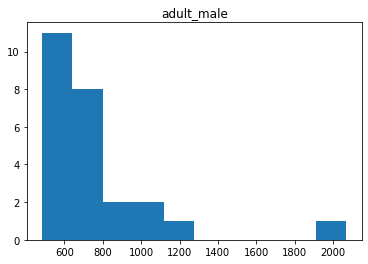

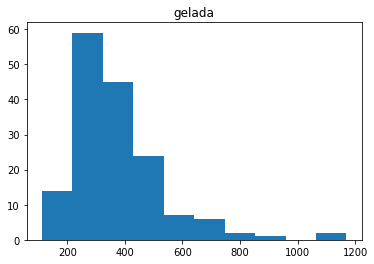

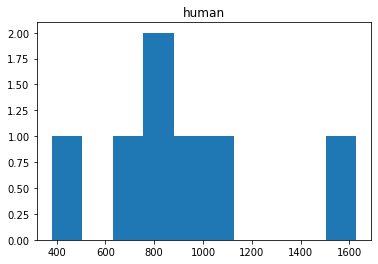

In [12]:
dataset_dicts = test_dicts
class_names = train_metadata.get("thing_classes")

object_sizes = {c_ind: [] for c_ind, c in enumerate(class_names)}

for entry in dataset_dicts:
    annotations = entry["annotations"]
    for annotation in annotations:
        if annotation.get("iscrowd", 0):
            continue
            
        obj_class = annotation['category_id']
        bbox = annotation['bbox']
        bbox_area = bbox[2] * bbox[3]
        object_sizes[obj_class].append(bbox_area)

for obj_name, sizes in zip(class_names, object_sizes.values()):
    sizes = np.array(sizes)
    plt.figure()
    plt.hist(sizes)
    plt.title(obj_name)
    print(f"{obj_name}: mean: {np.mean(sizes)}", 
          f"lowwer_quartile: {np.percentile(sizes, 25)}",
          f"upper_quartile: {np.percentile(sizes, 75)}",
          f"num annotations: {len(sizes)}")